In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0,33.6,0.627,50
1,1.0,NaN,66.0,29.0,0,26.6,0.351,31
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32
3,1.0,NaN,66.0,23.0,94,28.1,0.167,21
4,0.0,137.0,40.0,35.0,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,NaN,180,32.9,0.171,63
764,2.0,122.0,70.0,27.0,0,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112,26.2,0.245,30
766,1.0,126.0,60.0,0.0,0,30.1,0.349,47


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	19
float64		column 2	95
float64		column 3	19
float64		column 4	76
int64		column 5	0
float64		column 6	57
float64		column 7	38
int64		column 8	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,749.000000,673.000000,749.000000,692.000000,768.000000,711.000000,730.000000,768.000000
mean,3.825100,120.635958,69.074766,20.174855,79.799479,32.024332,0.467411,33.240885
std,3.348734,30.765671,19.447028,15.704758,115.244002,7.803066,0.318200,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.500000,0.244250,24.000000
50%,3.000000,117.000000,72.000000,22.000000,30.500000,32.000000,0.377000,29.000000
75%,6.000000,138.000000,80.000000,32.000000,127.250000,36.300000,0.622750,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000


<AxesSubplot:>

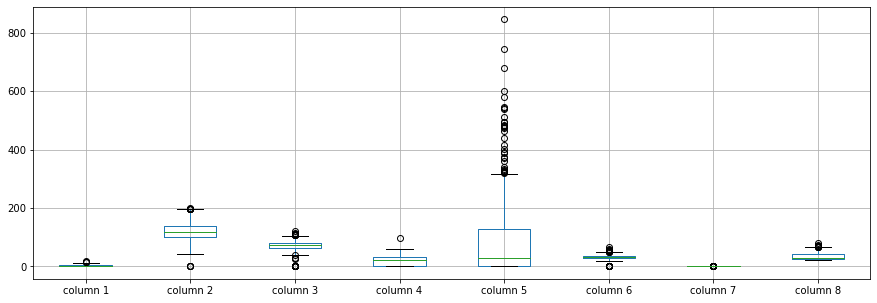

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.825100
column 2    120.635958
column 3     69.074766
column 4     20.174855
column 5     79.799479
column 6     32.024332
column 7      0.467411
column 8     33.240885
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.128058,0.145391,-0.067679,-0.061628,0.040083,-0.017704,0.545607
column 2,0.128058,1.000000,0.138224,0.012284,0.331004,0.196615,0.110027,0.222021
column 3,0.145391,0.138224,1.000000,0.191788,0.081405,0.253042,0.040756,0.241651
column 4,-0.067679,0.012284,0.191788,1.000000,0.426060,0.361992,0.166337,-0.129251
column 5,-0.061628,0.331004,0.081405,0.426060,1.000000,0.172591,0.212003,-0.042163
column 6,0.040083,0.196615,0.253042,0.361992,0.172591,1.000000,0.100037,0.040742
column 7,-0.017704,0.110027,0.040756,0.166337,0.212003,0.100037,1.000000,0.039059
column 8,0.545607,0.222021,0.241651,-0.129251,-0.042163,0.040742,0.039059,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+17,8+17+17,8+17+17+17,8+17+17+17+17,8+17+17+17+17+17,8+17+17+17+17,8+17+17+17,8+17+17,8+17,8], vae_layer = False, seed = 17)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 402.8021748860677
Epoch: 1 , loss: 405.7090867360433
Epoch: 2 , loss: 403.78579839070636
Epoch: 3 , loss: 405.1755650838216
Epoch: 4 , loss: 405.0439701080322
Epoch: 5 , loss: 404.6696211496989
Epoch: 6 , loss: 404.5201225280762
Epoch: 7 , loss: 402.889851252238
Epoch: 8 , loss: 400.25111961364746
Epoch: 9 , loss: 397.8549556732178
Epoch: 10 , loss: 387.81257184346515
Epoch: 11 , loss: 366.04214668273926
Epoch: 12 , loss: 350.46765899658203
Epoch: 13 , loss: 341.71905422210693
Epoch: 14 , loss: 335.4641399383545
Epoch: 15 , loss: 333.1522862116496
Epoch: 16 , loss: 333.3415988286336
Epoch: 17 , loss: 328.5096314748128
Epoch: 18 , loss: 320.87732887268066
Epoch: 19 , loss: 320.4400854110718
Epoch: 20 , loss: 316.6124954223633
Epoch: 21 , loss: 320.37039279937744
Epoch: 22 , loss: 314.3225908279419
Epoch: 23 , loss: 311.8937298456828
Epoch: 24 , loss: 307.6357774734497
Epoch: 25 , loss: 314.115426381429
E

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,0
1,0.0,-84.653328,0.0,0.000000,0,0.0,0.0,0
2,0.0,0.000000,0.0,0.000000,0,0.0,0.0,0
3,0.0,-88.600393,0.0,0.000000,0,0.0,0.0,0
4,0.0,0.000000,0.0,0.000000,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
763,0.0,0.000000,0.0,-47.581665,0,0.0,0.0,0
764,0.0,0.000000,0.0,0.000000,0,0.0,0.0,0
765,0.0,0.000000,0.0,0.000000,0,0.0,0.0,0
766,0.0,0.000000,0.0,0.000000,0,0.0,0.0,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1339.8261863659702, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.2319412275801069

In [18]:
new_df.iloc[66,:]

column 1      0.318012
column 2    109.000000
column 3     88.000000
column 4     30.000000
column 5      0.000000
column 6     32.500000
column 7      0.855000
column 8     38.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.000000,72.0,35.000000,0,33.6,0.627,50
1,1.0,0.346672,66.0,29.000000,0,26.6,0.351,31
2,8.0,183.000000,64.0,0.000000,0,23.3,0.672,32
3,1.0,0.399607,66.0,23.000000,94,28.1,0.167,21
4,0.0,137.000000,40.0,35.000000,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.000000,76.0,0.418335,180,32.9,0.171,63
764,2.0,122.000000,70.0,27.000000,0,36.8,0.340,27
765,5.0,121.000000,72.0,23.000000,112,26.2,0.245,30
766,1.0,126.000000,60.0,0.000000,0,30.1,0.349,47


In [20]:
imputations[-1].to_excel("PID_NE_5.xlsx", index=False, header=False)